## MANB1153-01 DATA MINING AND BUSNIESS ANALYTICS ##

Prepared by
- Muhammad Noor Yassin bin Mohd Yusof (MAN161025)
- Lim Yee Fang (MAN161019)
- Wan Nazirul Hafiz Wan Safie (MAN 161022)

Prepared for 
Dr Siti Sophiayati Yuhanis

### Objective ###

- To explore the data set of Students' Academic Performance Dataset (xAPI-Edu-Data)
- To study the relationship of teh attributes of the dataset
- To predict the value of student academic performance by using machine learning


### Data Description ##

The dataset consists of 305 males and 175 females. The students come from different origins such as 179 students are from Kuwait, 172 students are from Jordan, 28 students from Palestine, 22 students are from Iraq, 17 students from Lebanon, 12 students from Tunis, 11 students from Saudi Arabia, 9 students from Egypt, 7 students from Syria, 6 students from USA, Iran and Libya, 4 students from Morocco and one student from Venezuela.

The dataset is collected through two educational semesters: 245 student records are collected during the first semester and 235 student records are collected during the second semester.

The data set includes also the school attendance feature such as the students are classified into two categories based on their absence days: 191 students exceed 7 absence days and 289 students their absence days under 7.

This dataset includes also a new category of features; this feature is parent parturition in the educational process. Parent participation feature have two sub features: Parent Answering Survey and Parent School Satisfaction. There are 270 of the parents answered survey and 210 are not, 292 of the parents are satisfied from the school and 188 are not.

#### Step 1 : Import neccessary library ####

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab as pl

#### Step 2 : Import the dataset from this address and assign it to data frame. ####

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/yassinmy/datamininggroupproject/master/xAPI-Edu-Data.csv')

#### Step 3 : Summarising the DataFrame ####
Numbers of row, column and data type

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


Using built-in describe() function to performs summary statistics calculations on all numeric columns, and returns them as a DataFrame.

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
raisedhands,480.0,46.775000,30.779223,0.0,15.75,50.0,75.0,100.0
VisITedResources,480.0,54.797917,33.080007,0.0,20.00,65.0,84.0,99.0
AnnouncementsView,480.0,37.918750,26.611244,0.0,14.00,33.0,58.0,98.0
Discussion,480.0,43.283333,27.637735,1.0,20.00,39.0,70.0,99.0


View the first and last 5 row
By default, it set to be 5. Unless another number is coded.

In [10]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [12]:
data.head(6)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M


In [9]:
data.tail()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


In [19]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


#### Step 4 : Exploring Data ####
Display the dtype attribute of int on hist

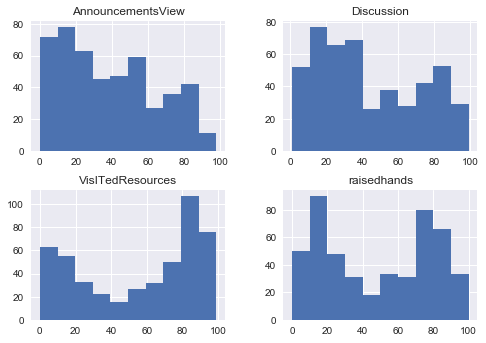

In [4]:
dataint = data[['VisITedResources','Discussion', 'raisedhands','AnnouncementsView']]
dataint.hist()
plt.show();

In [19]:
data.groupby(['gender'])['gender'].count()

gender
F    175
M    305
Name: gender, dtype: int64

#### Step 6 : Categorizing ####
Group the data according to the gender and provide the mean of Discussion value

In [29]:
data.groupby('gender').Discussion.agg(['mean'])

,mean
gender,
F,47.828571
M,40.675410


Group the student according to the gender and then it class. For each category, the mean of Discussion is tabulated.

From the data, we can conclude that Male who are in low class usually just spend 26.9 times of discussion compared to the high class who spend 55.6 times. 

### It a double number! ###

In [30]:
data.groupby(['gender','Class']).Discussion.agg(['mean'])

mean
gender Class           
F      H      51.933333
       L      47.708333
       M      43.815789
M      H      55.597015
       L      26.902913
       M      43.777778

Only 4 students who are in high class absent more than 7 days,while the others below 7 days.

While in the low class, 116 students tend not to attend the class more than 7 days, and only 11 students absent less than 7 days.

In [35]:
absent = data.groupby(['Class', 'StudentAbsenceDays']).size()
absent

Class  StudentAbsenceDays
H      Above-7                 4
       Under-7               138
L      Above-7               116
       Under-7                11
M      Above-7                71
       Under-7               140
dtype: int64

#### Step 7 : Data Visualising ####

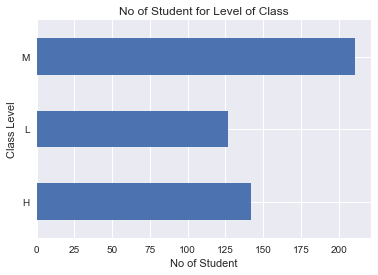

In [32]:
data['Class'].unique()
class_group = data.groupby('Class').apply(lambda x: len(x))
class_group

class_group.plot(kind='barh', grid=True)
plt.ylabel('Class Level')
plt.xlabel('No of Student')
plt.title('No of Student for Level of Class')

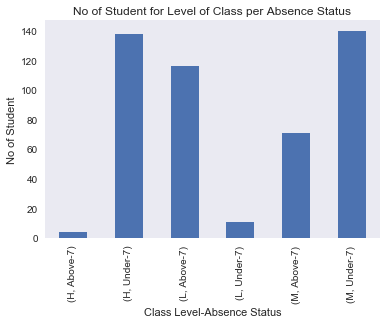

In [39]:
absent.plot(kind='bar', grid=False)
plt.xlabel('Class Level-Absence Status')
plt.ylabel('No of Student')
plt.title('No of Student for Level of Class per Absence Status')

#### What is .T for? ####

.T is to tranform the table from horizontally to vertically

In [14]:
data.head(n=2).T

,0,1
gender,M,M
NationalITy,KW,KW
PlaceofBirth,KuwaIT,KuwaIT
StageID,lowerlevel,lowerlevel
GradeID,G-04,G-04
SectionID,A,A
Topic,IT,IT
Semester,F,F
Relation,Father,Father
raisedhands,15,20


In [20]:
categorical_features = (data.select_dtypes(include=['object']).columns.values)
categorical_features

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'], dtype=object)

In [21]:
numerical_features = data.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'], dtype=object)

#### Data Visualization : Pivot and Heat Map diagram ####

In [23]:
pivot = pd.pivot_table(data,
            values = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'],
            index = ['gender', 'NationalITy', 'PlaceofBirth'], 
                       columns= ['ParentschoolSatisfaction'],
                       aggfunc=[np.mean], 
                       margins=True).fillna('')
pivot

mean                       \
                                raisedhands                        
ParentschoolSatisfaction                Bad     Good         All   
gender NationalITy PlaceofBirth                                    
F      Egypt       Egypt                        57.5   57.500000   
       Iran        Iran                            2    2.000000   
       Iraq        Iraq                      62.8333   62.833333   
       Jordan      Egypt                100           100.000000   
                   Jordan           31.6087  58.9583   50.098592   
                   KuwaIT                         87   87.000000   
                   Palestine                    77.5   77.500000   
                   USA                   60            60.000000   
                   lebanon              100       75   83.333333   
       KW          KuwaIT           38.3043  47.3103   43.326923   
                   USA                   60       70   65.000000   
       Lybia       Lybia                         9.5    9.500000   
       Morocco     Morocco                        72   72.000000   
       Palestine   Jordan                    79.1667   79.166667   
                   Palestine                      76   76.000000   
       SaudiArabia SaudiArabia           66       50   60.666667   
                   USA                  100           100.000000   
       Syria       Syria                          88   88.000000   
       Tunis       USA                            70   70.000000   
       USA         USA                   15       54   44.250000   
       lebanon     lebanon            48.75  78.1429   67.454545   
M      Egypt       Egypt                 49       39   40.666667   
                   KuwaIT                12            12.000000   
       Iran        Iran             29.3333     17.5   24.600000   
       Iraq        Iraq                       77.875   77.875000   
       Jordan      Jordan           31.4848  52.1667   43.740741   
                   Palestine                      74   74.000000   
                   SaudiArabia      61.3333       12   44.888889   
                   USA                  100           100.000000   
       KW          KuwaIT           29.9091  36.7966   33.160000   
       Lybia       Lybia                          15   15.000000   
       Morocco     Morocco          53.6667            53.666667   
       Palestine   Jordan                     82.125   82.125000   
                   Palestine                    85.5   85.500000   
       SaudiArabia SaudiArabia            7       75   52.333333   
                   USA                   50       23   43.250000   
       Syria       Jordan                          9    9.000000   
                   Syria               25.5     19.5   22.500000   
       Tunis       KuwaIT                22            22.000000   
                   SaudiArabia           70            70.000000   
                   Tunis               24.6    61.75   41.111111   
       USA         USA                            37   37.000000   
       lebanon     Jordan                         87   87.000000   
                   lebanon          23.3333     78.5   45.400000   
       venzuela    venzuela                       80   80.000000   
All                                 35.3936  54.1027   46.775000   

                                                                      \
                                VisITedResources                       
ParentschoolSatisfaction                     Bad     Good        All   
gender NationalITy PlaceofBirth                                        
F      Egypt       Egypt                               67  67.000000   
       Iran        Iran                                 9   9.000000   
       Iraq        Iraq                              90.5  90.500000   
       Jordan      Egypt                      80           80.000000   
                   Jordan                36.2609  84.2083  68.

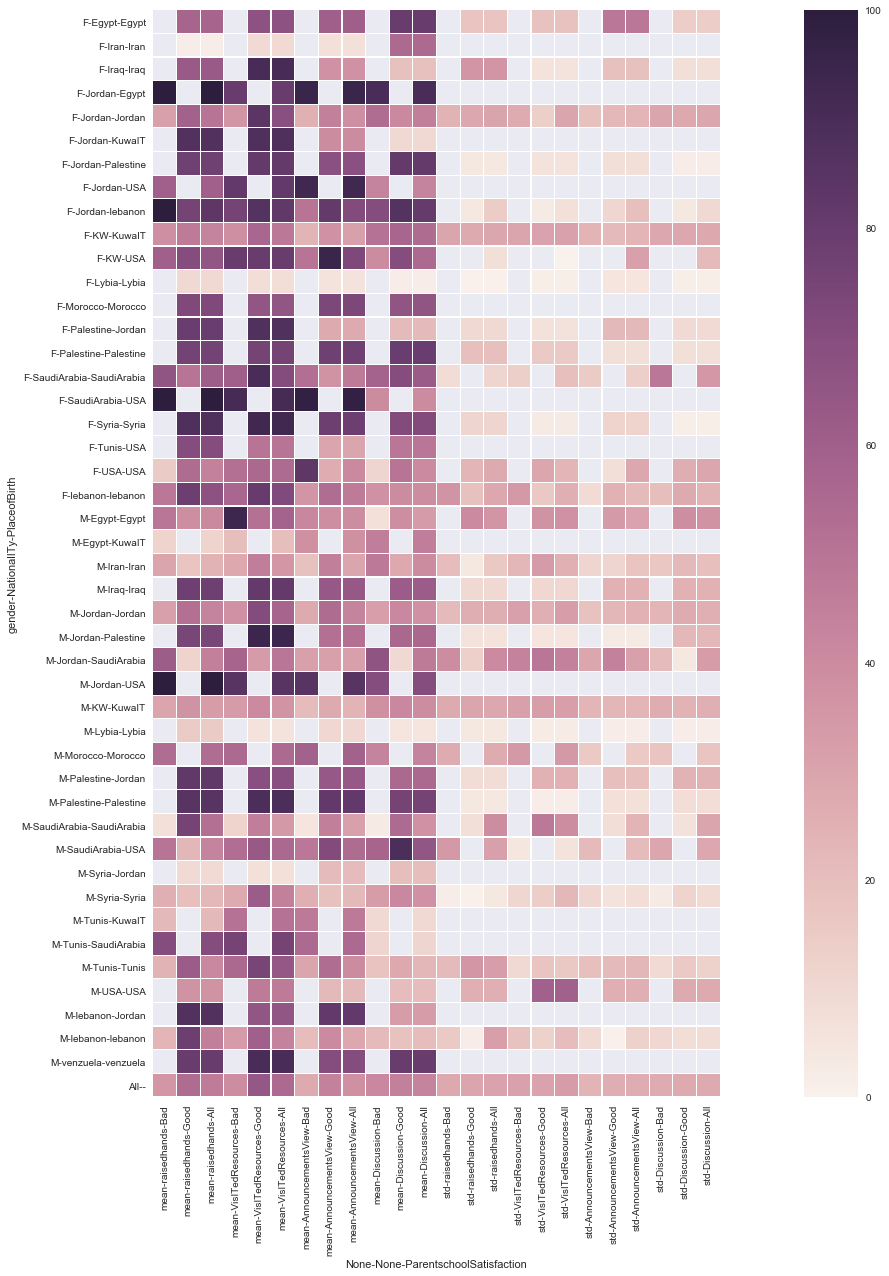

In [25]:
pivot = pd.pivot_table(data,
            values = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'],
            index = ['gender', 'NationalITy', 'PlaceofBirth'], 
                       columns= ['ParentschoolSatisfaction'],
                       aggfunc=[np.mean, np.std], 
                       margins=True)
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
plt.subplots(figsize = (30, 20))
sns.heatmap(pivot,linewidths=0.2,square=True )